## Importance Sampling Example

Author: Audrey Olivier 

Date: May 8, 2019

For importance sampling, the function must be written in a way that it can evaluate multiple samples at once.

In [7]:
from UQpy.Distributions import Uniform, JointInd
from UQpy.SampleMethods import IS
from UQpy.Utilities import IS_diagnostics
import time
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def log_Rosenbrock(x, param):
     return (-(100*(x[:, 1]-x[:, 0]**2)**2+(1-x[:, 0])**2)/param)
    
def Rosenbrock(x, param):
     return np.exp(-(100*(x[:, 1]-x[:, 0]**2)**2+(1-x[:, 0])**2)/param)

In [10]:
proposal = JointInd([Uniform(loc=-8, scale=16), Uniform(loc=-10, scale=60)])
print(proposal.get_params())

{'loc_0': -8, 'scale_0': 16, 'loc_1': -10, 'scale_1': 60}


### Run IS

0.010401010513305664


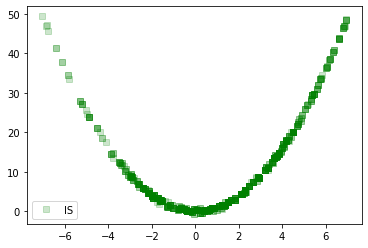

In [11]:
t4 = time.time()
w = IS(log_pdf_target=log_Rosenbrock, args_target=(20, ), nsamples=10000, proposal=proposal)
#w = IS(pdf_target=Rosenbrock, args_target=(20, ), nsamples=10000, proposal=proposal)
t_IS = time.time()-t4
print(t_IS)

new_samples = w.resample(size=1000)
plt.plot(new_samples[:,0],new_samples[:,1],'gs',alpha=0.2)
plt.legend(['IS'])
plt.show()

### Run IS by adding samples: call the run method in a loop (one can also look at diagnostics)

(5000, 2)
(10000, 2)
(15000, 2)
(20000, 2)
0.02079319953918457


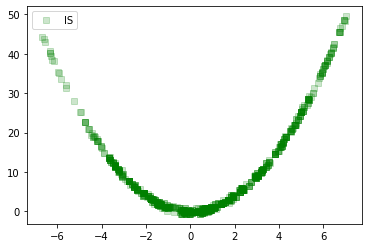

In [12]:
t4 = time.time()
w = IS(log_pdf_target=log_Rosenbrock, args_target=(20, ), proposal=proposal)
for nsamples in [5000, 5000, 5000, 5000]:
    w.run(nsamples)
    print(w.samples.shape)
    #IS_diagnostics(weights=w.weights, graphics=False)
t_IS = time.time()-t4
print(t_IS)

new_samples = w.resample(size=1000)
plt.plot(new_samples[:,0],new_samples[:,1],'gs',alpha=0.2)
plt.legend(['IS'])
plt.show()